<a href="https://colab.research.google.com/github/CaduPereira0921/Celsius_to_Fahrenheit/blob/main/Projeto_Turma_09_Celsius_to_Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1: Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.19.0'

# Etapa 2: Importação de base de dados

In [5]:
temperature_df = pd.read_csv('Celsius-to-Fahrenheit.csv')

In [8]:
temperature_df

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


In [9]:
temperature_df.head() #exibe as 5 primeiras linhas do DataFrame 'temperature_df'

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [7]:
temperature_df.tail(1) #similar ao anterior, mas mostra as últimas linhas do DataFrame 'temperature_df'

,Celsius,Fahrenheit
29,60,140.0


In [10]:
temperature_df.info() #resumo conciso do DataFrame (O tipo de coluna; Quantidade de coluna não nulas existentes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [11]:
temperature_df.describe() #gera estatísticas básicas do DataFrame

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


# Etapa 3: Visualização da Base de dados

AxisError: axis 1 is out of bounds for array of dimension 1

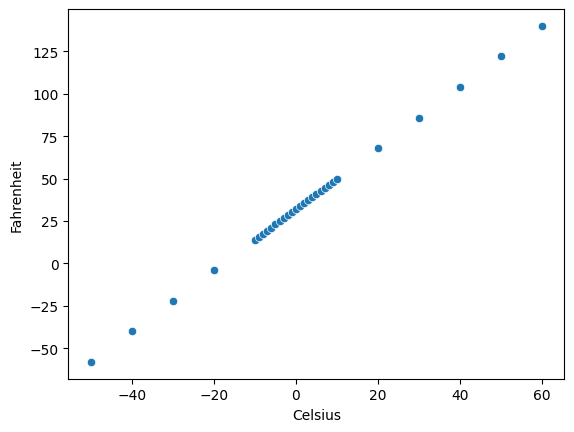

In [15]:
sns.scatterplot(x=temperature_df['Celsius'], y=temperature_df['Fahrenheit']);
# sns.scatterplot([1,0], [2,0])
data = np.concatenate([temperature_df['Celsius'], temperature_df['Fahrenheit']], axis=1)
sns.scatterplot(data[:, 0], data[:, 1]);
sns.scatterplot(temperature_df['Celsius'], temperature_df['Fahrenheit']);

In [ ]:
# O erro acima acontece, pois estava tentando juntar as duas listas simples (1 dimensão).
# Para juntá-las lado a lado, elas precisam ser tratadas como colunas de uma tabela e não apenas como linhas
# o que exige com que tenham mais de uma dimensão inicialmente.

# Etapa 4: Configuração da Base de Treinamento

In [18]:
X_train = temperature_df['Celsius'] #seleciona a coluna Celsius do DataFrame, atribuindo à variável 'x_train' como entrada, ou seja, a info que daremos ao modelo.
y_train = temperature_df['Fahrenheit'] #seleciona a coluna Fahrenheit do DataFrame, atribuindo à variável 'y_train' como saída, ou seja, o que queremos descobrir.


In [19]:
X_train.shape #mostra que a variável é um array de 30 valores de temperatura Celsius para treinamento.

(30,)

In [21]:
y_train.shape #mostra que a variável é um array de 30 valores de temperatura Fahrenheit para treinamento.

(30,)

# Etapa 5: Construção e treinamento do modelo

In [22]:
model = tf.keras.Sequential() #inicializa um modelo de rede neural no Keras. 'Sequential' significa que as camadas da rede neural serão empilhadas uma após a outra, de forma linear.

In [23]:
model

<Sequential name=sequential, built=False>

In [24]:
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1])) #adicionar camadas ao modelo que criamos. Utilizaremos uma camada "Densa", isso significa que cada neurônio estará conectado a todos da camada anterior.
                                                              #adiciono apenas '1' unidade, pois esperamos apenas uma única saída (de Celsius para Fahrenheit)
                                                              #informa ao Keras a forma dos dados que o modelo receberá: [1] significa que cada entrada será um único valor (apenas Celsius)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary() #visualizar a arquitetura do modelo Keras, contém: nome e tipo de camada; quantidade de neurônios e parâmetros treinados (pesos e vieses)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.1), loss = 'mean_squared_error') #configuramos o processo de aprendizado do modelo, utilizamos o Adam como otimizador
                                                                                                    #'learning_rate' define a taxa de aprendizado e controla quão grande são os passos que o otimizador dá ao ajustar os pesos do modelo.
                                                                                                    #a função perda mede quão ruim é o desempenho do modelo. Durante o treinamento, o objetivo do otimizador é minimizar essa função de perda. O 'mean_squared_error' calcula a média dos quadrados das diferenças entre os valores previstos pelo modelo e os valores reais.


In [27]:
epochs_hist = model.fit(X_train, y_train, epochs = 1000, verbose = 1 ) #inicia o treinamento do modelo Keras, trazendo das variáveis, as épocas (quantidade de vezes que o modelo passará por todo conjunto de treinamento) e verbose para controlar o que iremos visualizar.

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step - loss: 1040.9783
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 1017.1243
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 1003.6207
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 998.3440
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 996.2527
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 992.4333
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 985.5950
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 976.9015
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 967.9807
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 960.0422
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 953.5745
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 948.3078
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 943.4578
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 938.2141
Epoch 15/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 

# Etapa 6: Avaliação do Modelo

In [29]:
epochs_hist.history.keys() #usado para inspecionar quais métricas foram registradas durante o treinamento do modelo

dict_keys(['loss'])

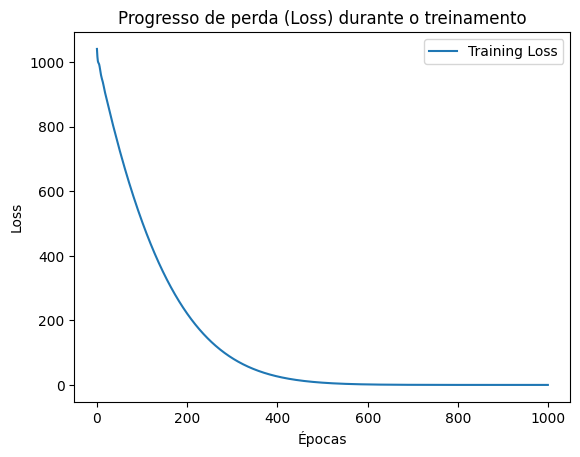

In [31]:
#fundamental para entender se o modelo está aprendendo e se a perda está diminuindo ao longo do tempo. Uma perda decrescente indica que o modelo está melhorando suas previsões.

plt.plot(epochs_hist.history['loss'])
plt.title('Progresso de perda (Loss) durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend(['Training Loss'])

In [33]:
model.get_weights() #identificar os valores que o modelo aprendeu. F = (C * 1,8) + 32

[array([[1.8000861]], dtype=float32), array([31.978285], dtype=float32)]

In [34]:
temp_c = -5

In [36]:
temp_f = model.predict(np.array([temp_c]).reshape(-1, 1)) # usar o modelo treinado para calcular o Fahrenheit

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


In [38]:
np.round((temp_f), 1) #utilizo o NumPy.Round para arredondar o valor e pronto!

array([[23.]], dtype=float32)